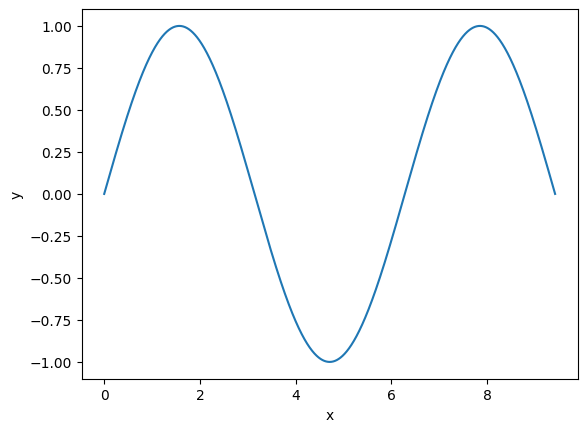

In [1]:

import time

import matplotlib.pyplot as plt

import numpy as np
from easyscience.Datasets.xarray import xr

d = xr.Dataset()

nx = 5E3
x_min = 0
x_max = 3*np.pi

x = np.linspace(x_min, x_max, num=int(nx))

d.easyscience.add_coordinate('x', x)
d.easyscience.add_variable('y', ['x'], np.sin(x), auto_sigma=False)

d['y'].plot()
plt.show()


In [2]:


d.easyscience.remove_variable('y')
d.easyscience.add_coordinate('y', x + np.pi)
d.easyscience.add_variable('z', ['x', 'y'], np.sin(x).reshape((-1, 1))*np.cos(x).reshape((1, -1)) + (0.5 - np.random.random(size=(int(nx), int(nx)))))

<xarray.DataArray 'z' (x: 5000, y: 5000)> Size: 200MB
array([[ 0.12090457, -0.1943145 , -0.00669793, ...,  0.27551692,
         0.11673605,  0.26466446],
       [ 0.19595327,  0.44147655, -0.12417558, ..., -0.04884676,
        -0.29007725,  0.01231336],
       [ 0.20574669, -0.10492785, -0.37479724, ..., -0.20808373,
         0.09172847,  0.04664657],
       ...,
       [-0.47369099, -0.15270331,  0.09078689, ..., -0.05750884,
        -0.36111913, -0.08864099],
       [ 0.01949489,  0.19961792, -0.4851448 , ...,  0.42912303,
        -0.32634914,  0.20791447],
       [ 0.10747075,  0.34926494, -0.41682289, ..., -0.32473967,
        -0.00241064,  0.27920331]])
Coordinates:
  * x        (x) float64 40kB 0.0 0.001885 0.003771 ... 9.421 9.423 9.425
  * y        (y) float64 40kB 3.142 3.143 3.145 3.147 ... 12.56 12.56 12.57

In [3]:

def func(x, *args, **kwargs):
    return np.sin(x[:, 0]) * np.cos(x[:, 1])


In [4]:

bdims, f = d['z'].easyscience.fit_prep(func)
d['x_broadcast'], d['y_broadcast'] = bdims


AttributeError: 'DataArray' object has no attribute 'easyscience'

In [ ]:

print('Applying func - No dask')
t = time.time()
d['computed_no_dask'] = xr.apply_ufunc(f, d['x_broadcast'], d['y_broadcast'])
temp = d['z'] - d['computed_no_dask']
print(f'Time taken: {time.time() - t}')
temp.plot()
plt.show()

print('Applying func - Dask')
t = time.time()
to_chunk = ['x_broadcast', 'y_broadcast', 'z']
for name in to_chunk:
    d[name] = d[name].chunk({'x': 4000, 'y': 4000})
d['computed_dask'] = xr.apply_ufunc(f, d['x_broadcast'], d['y_broadcast'], dask='parallelized')
temp = d['z'] - d['computed_dask']
temp.compute()
print(f'Time taken: {time.time() - t}')
temp.plot()
plt.show()

print('All done :-)')
